In [1]:
# from sklearn import svm
# X = [[0, 0], [2, 2]]
# y = [0.5, 2.5]
# clf = svm.SVR()
# clf.fit(X, y)
# clf.predict([[1, 1]])

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from dateutil.relativedelta import relativedelta
import datetime
import time
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import linear_model

import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

from sklearn.metrics import r2_score

# import scipy
# from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet  # 批量导入要实现的回归算法
# from sklearn.svm import SVR  # SVM中的回归算法
# from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法
# from sklearn.model_selection import cross_val_score  # 交叉检验
# from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split


# import tensorflow as tf
import matplotlib as mpl
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional,Conv2D


from sklearn.preprocessing import StandardScaler
from collections import deque
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

# from tensorflow.keras.models import Sequential
            
    

plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签 
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline

In [3]:
df1=pd.read_excel('E:/NSCA/sca_extend.xls')    # header =0  是去掉表头的 
df1

,date,SCA_NA,SCA_EA,SCA_NH
0,2000-03-01T00:00:00,2.035561e+07,2.841009e+07,4.876570e+07
1,2000-04-01T00:00:00,2.002511e+07,2.276153e+07,4.278664e+07
2,2000-05-01T00:00:00,1.711526e+07,1.395175e+07,3.106701e+07
3,2000-06-01T00:00:00,1.147184e+07,3.674123e+06,1.514596e+07
4,2000-07-01T00:00:00,6.579018e+06,1.003353e+06,7.582371e+06
...,...,...,...,...
259,2021-10-01T00:00:00,1.133905e+07,1.194660e+07,2.328566e+07
260,2021-11-01T00:00:00,1.083025e+07,1.883996e+07,2.967021e+07
261,2021-12-01T00:00:00,8.599598e+06,1.622152e+07,2.482112e+07
262,2022-01-01T00:00:00,1.300114e+07,2.367501e+07,3.667615e+07


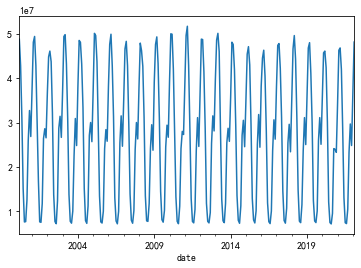

In [4]:
df1.set_index('date',inplace=True)
df1.index=pd.to_datetime(df1.index)

#drop null values
df1.dropna(inplace=True)
df1['SCA_NH'].plot()


In [5]:
df=df1

In [6]:
df.dropna(inplace=True)
df

,SCA_NA,SCA_EA,SCA_NH
date,,,
2000-03-01,2.035561e+07,2.841009e+07,4.876570e+07
2000-04-01,2.002511e+07,2.276153e+07,4.278664e+07
2000-05-01,1.711526e+07,1.395175e+07,3.106701e+07
2000-06-01,1.147184e+07,3.674123e+06,1.514596e+07
2000-07-01,6.579018e+06,1.003353e+06,7.582371e+06
...,...,...,...
2021-10-01,1.133905e+07,1.194660e+07,2.328566e+07
2021-11-01,1.083025e+07,1.883996e+07,2.967021e+07
2021-12-01,8.599598e+06,1.622152e+07,2.482112e+07


In [7]:
df.drop(columns=['SCA_NA','SCA_EA'], axis=1, inplace=True)
df

,SCA_NH
date,
2000-03-01,4.876570e+07
2000-04-01,4.278664e+07
2000-05-01,3.106701e+07
2000-06-01,1.514596e+07
2000-07-01,7.582371e+06
...,...
2021-10-01,2.328566e+07
2021-11-01,2.967021e+07
2021-12-01,2.482112e+07


In [8]:
df.dropna(inplace=True)

In [9]:
# scaler = StandardScaler()
# df['label'] = scaler.fit_transform(df.iloc[:,-1:])  # add
# df

In [10]:
def Stock_Price_LSTM_Data_Precesing(df,mem_his_days,pre_days):

    df.sort_index(inplace=True)
    df['label'] = df['SCA_NH'].shift(-pre_days)
#     df.dropna(inplace=True)# add
    

    scaler = StandardScaler()
    sca_X = scaler.fit_transform(df.iloc[:,:-1])

    
    deq = deque(maxlen=mem_his_days)

    X = []
    for i in sca_X:
        deq.append(list(i))
        if len(deq)==mem_his_days:
            X.append(list(deq))

    X_lately = X[-pre_days:]
    X = X[:-pre_days]

    y = df['label'][mem_his_days-1:-pre_days]

   
    X = np.array(X)
    y = np.array(y)
    print('X',X.shape,'len(X)',len(X))
    print('y',y.shape,'len(y)',len(y))
    print('len(X_lately)  其实这个是预测pre_days的长度',len(X_lately))
    print('X[0]',X[0])
    print('y[0]',y[0])
    return X,y,X_lately

In [11]:
# R^2
from keras import backend as K
def RSquared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
#进行除法运算时，通常将其添加到分母中以防止被零除误差。Epsilon是一个很小的值，与分母的值几乎没有区别，但可确保它不等于零。

Using TensorFlow backend.


In [12]:


mem_days = [3]  #最优为3  {1,2，3,6,8}

pre_days =[3]
lstm_layers = [3]
dense_layers = [3]
units = [128]
# mem_days = [3]


# lstm_layers = [3]
# dense_layers = [2]
# units = [64]
# 所以units代表的不是一层单元的个数，而是单元内部隐藏层的大小。

In [13]:
# for the_mem_days in mem_days:
#     for the_lstm_layers in lstm_layers:
#         for the_dense_layers in dense_layers:
#             for the_units in units:
#                 for the_pre_days in pre_days:
#                     filepath = 'F:/model-log2/1var/gru/{val_mape:.2f}_{epoch:02d}_'+f'mem_{the_mem_days}_pre_{the_pre_days}_lstm_{the_lstm_layers}_dense_{the_dense_layers}_unit_{the_units}'

#                     checkpoint = ModelCheckpoint(
#                         filepath=filepath,
#                         save_weights_only=True,
#                         monitor='val_mape',
#                         mode='min',
#                         save_best_only=True)

#                     X,y,X_lately = Stock_Price_LSTM_Data_Precesing(df,the_mem_days,the_pre_days)

#                     X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=False,test_size=0.1)

#                     print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

#                     dft=df[the_mem_days-1:-the_pre_days] # 这个是为了的时间y统一的 搞了个副本


#                     #X_train中间这个也叫作TIME_STEPS 步长 也就是mem_days   
#                     #GRU LSTM 必须要输入3D 张量
#                     print(X[0])

#                     model_g = Sequential()
#                     model_g.add(GRU(the_units,input_shape=X.shape[1:],activation='relu',return_sequences=True))
#                     model_g.add(Dropout(0.1))             

#     #                 model.add(Conv2D(3,3,3,input_shape= girl.shape,name='conv_1'))#加入一个卷积层，filter数量为3，卷积核size为（3,3）

#                     for i in range(the_lstm_layers):
#                         model_g.add(GRU(the_units,activation='relu',return_sequences=True))
#                         model_g.add(Dropout(0.1))

#                     model_g.add(GRU(the_units,activation='relu'))
#                     model_g.add(Dropout(0.1))

#                     for i in range(the_dense_layers):
#                         model_g.add(Dense(the_units,activation='relu'))
#                         model_g.add(Dropout(0.1))

#                     model_g.add(Dense(1))

#                     adam = keras.optimizers.Adam(lr=0.008)#  这里应该没有使用上啊

#                     model_g.compile(optimizer='adam',
#     #                              loss='mse',     #都是选择 了这个mse 大部分    重新自定义loss 是没必要
#                                  loss='mean_squared_error',
#                                  metrics=[ 'mae', 'mape',RSquared])#   相当于编译  也要选择RSquared 不过得自己定义函数

#                     history_g=model_g.fit(X_train,y_train,batch_size=32,verbose=2,epochs=250,validation_data=(X_test,y_test) ,shuffle = False,callbacks=[checkpoint])


#     #                 ,callbacks=[checkpoint]

In [14]:
for the_mem_days in mem_days:
    for the_lstm_layers in lstm_layers:
        for the_dense_layers in dense_layers:
            for the_units in units:
                for the_pre_days in pre_days:
                    filepath = 'F:/model-log3/1var/lstm/{val_mape:.2f}_{epoch:02d}_'+f'mem_{the_mem_days}_pre_{the_pre_days}_lstm_{the_lstm_layers}_dense_{the_dense_layers}_unit_{the_units}'

                    checkpoint = ModelCheckpoint(
                        filepath=filepath,
                        save_weights_only=True,
                        monitor='val_mape',
                        mode='min',
                        save_best_only=True)

                    X,y,X_lately = Stock_Price_LSTM_Data_Precesing(df,the_mem_days,the_pre_days)

                    X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=False,test_size=0.1)

                    print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

                    dft=df[the_mem_days-1:-the_pre_days] # 这个是为了的时间y统一的 搞了个副本


                    #X_train中间这个也叫作TIME_STEPS 步长 也就是mem_days   
                    #GRU LSTM 必须要输入3D 张量
                    print(X[0])

                    model_l = Sequential()
                    model_l.add(LSTM(the_units,input_shape=X.shape[1:],activation='relu',return_sequences=True))
                    model_l.add(Dropout(0.1))             

    #                 model.add(Conv2D(3,3,3,input_shape= girl.shape,name='conv_1'))#加入一个卷积层，filter数量为3，卷积核size为（3,3）

                    for i in range(the_lstm_layers):
                        model_l.add(LSTM(the_units,activation='relu',return_sequences=True))
                        model_l.add(Dropout(0.1))

                    model_l.add(LSTM(the_units,activation='relu'))
                    model_l.add(Dropout(0.1))

                    for i in range(the_dense_layers):
                        model_l.add(Dense(the_units,activation='relu'))
                        model_l.add(Dropout(0.1))

                    model_l.add(Dense(1))

                    adam = keras.optimizers.Adam(lr=0.003)

                    model_l.compile(optimizer=adam,
    #                              loss='mse',     #都是选择 了这个mse 大部分    重新自定义loss 是没必要
                                 loss='mean_squared_error',
                                 metrics=[ 'mae', 'mape',RSquared])#   相当于编译  也要选择RSquared 不过得自己定义函数

                    history_l=model_l.fit(X_train,y_train,batch_size=32,verbose=2,epochs=300,validation_data=(X_test,y_test) ,shuffle = False,callbacks=[checkpoint])

    #                 ,callbacks=[checkpoint]

X (259, 3, 1) len(X) 259
y (259,) len(y) 259
len(X_lately)  其实这个是预测pre_days的长度 3
X[0] [[1.50501578]
 [1.08876427]
 [0.2728654 ]]
y[0] 7666191.681995175
(233, 3, 1) (26, 3, 1) (233,) (26,)
[[1.50501578]
 [1.08876427]
 [0.2728654 ]]
Train on 233 samples, validate on 26 samples
Epoch 1/300
233/233 - 9s - loss: 940656759982633.7500 - mae: 27104768.0000 - mape: 100.0000 - RSquared: -3.6072e+00 - val_loss: 938523033075712.0000 - val_mae: 27161388.0000 - val_mape: 100.0000 - val_RSquared: -3.6743e+00
Epoch 2/300
233/233 - 1s - loss: 940655598682463.6250 - mae: 27104746.0000 - mape: 99.9999 - RSquared: -3.6072e+00 - val_loss: 938498404122624.0000 - val_mae: 27160940.0000 - val_mape: 99.9976 - val_RSquared: -3.6742e+00
Epoch 3/300
233/233 - 1s - loss: 939861773978646.0000 - mae: 27088932.0000 - mape: 99.9043 - RSquared: -3.6009e+00 - val_loss: 928868147920896.0000 - val_mae: 26986428.0000 - val_mape: 99.0487 - val_RSquared: -3.6263e+00
Epoch 4/300
233/233 - 1s - loss: 852223939238283.5000 - mae

Epoch 39/300
233/233 - 0s - loss: 47013109526826.8516 - mae: 5093784.5000 - mape: 18.1217 - RSquared: 0.7654 - val_loss: 37847272783872.0000 - val_mae: 5001988.5000 - val_mape: 17.6972 - val_RSquared: 0.8115
Epoch 40/300
233/233 - 0s - loss: 43844439115978.1641 - mae: 5095222.0000 - mape: 18.3037 - RSquared: 0.7751 - val_loss: 37343499124736.0000 - val_mae: 4984963.0000 - val_mape: 17.4188 - val_RSquared: 0.8140
Epoch 41/300
233/233 - 0s - loss: 51439345766101.1484 - mae: 5420533.0000 - mape: 19.0967 - RSquared: 0.7470 - val_loss: 38486002368512.0000 - val_mae: 4976077.0000 - val_mape: 18.6572 - val_RSquared: 0.8083
Epoch 42/300
233/233 - 0s - loss: 48612447487639.6172 - mae: 5146573.0000 - mape: 18.5060 - RSquared: 0.7604 - val_loss: 39073444003840.0000 - val_mae: 5018270.5000 - val_mape: 19.6344 - val_RSquared: 0.8054
Epoch 43/300
233/233 - 0s - loss: 44011579430182.4531 - mae: 4895939.5000 - mape: 17.4596 - RSquared: 0.7394 - val_loss: 37466065076224.0000 - val_mae: 4888198.0000 - v

Epoch 79/300
233/233 - 0s - loss: 34636337982732.0859 - mae: 4288664.0000 - mape: 15.8731 - RSquared: 0.8231 - val_loss: 30222321713152.0000 - val_mae: 4197865.0000 - val_mape: 16.3487 - val_RSquared: 0.8495
Epoch 80/300
233/233 - 0s - loss: 36156757224575.4531 - mae: 4245081.0000 - mape: 15.1775 - RSquared: 0.8174 - val_loss: 28374644817920.0000 - val_mae: 3982048.0000 - val_mape: 14.1086 - val_RSquared: 0.8587
Epoch 81/300
233/233 - 0s - loss: 42776505430947.7109 - mae: 4708142.5000 - mape: 16.9549 - RSquared: 0.7758 - val_loss: 29309053960192.0000 - val_mae: 4143709.5000 - val_mape: 14.6230 - val_RSquared: 0.8540
Epoch 82/300
233/233 - 0s - loss: 45089061115244.7656 - mae: 4805738.0000 - mape: 17.1335 - RSquared: 0.7649 - val_loss: 29694242062336.0000 - val_mae: 4200367.5000 - val_mape: 14.7944 - val_RSquared: 0.8521
Epoch 83/300
233/233 - 0s - loss: 41178778208880.0625 - mae: 4636669.5000 - mape: 16.5205 - RSquared: 0.7712 - val_loss: 28043322064896.0000 - val_mae: 3899838.5000 - v

Epoch 119/300
233/233 - 0s - loss: 26231985888611.9844 - mae: 3717791.2500 - mape: 14.1000 - RSquared: 0.8752 - val_loss: 16879746809856.0000 - val_mae: 2991176.0000 - val_mape: 9.4456 - val_RSquared: 0.9159
Epoch 120/300
233/233 - 0s - loss: 28858342179941.0820 - mae: 3962128.2500 - mape: 15.1298 - RSquared: 0.8665 - val_loss: 9000619868160.0000 - val_mae: 2315438.2500 - val_mape: 9.4170 - val_RSquared: 0.9552
Epoch 121/300
233/233 - 1s - loss: 17628292777904.8906 - mae: 3100141.7500 - mape: 12.2769 - RSquared: 0.9134 - val_loss: 7930199408640.0000 - val_mae: 2151652.0000 - val_mape: 8.3708 - val_RSquared: 0.9605
Epoch 122/300
233/233 - 0s - loss: 23188546589920.1367 - mae: 3541691.5000 - mape: 12.9711 - RSquared: 0.8932 - val_loss: 7753304113152.0000 - val_mae: 2120237.5000 - val_mape: 8.0734 - val_RSquared: 0.9614
Epoch 123/300
233/233 - 0s - loss: 19014075126867.5039 - mae: 3164386.2500 - mape: 12.5693 - RSquared: 0.9024 - val_loss: 8046804729856.0000 - val_mae: 2223188.2500 - val_

Epoch 159/300
233/233 - 0s - loss: 17545586784686.6934 - mae: 2993831.2500 - mape: 11.2095 - RSquared: 0.9175 - val_loss: 6457855049728.0000 - val_mae: 1954500.2500 - val_mape: 6.8968 - val_RSquared: 0.9678
Epoch 160/300
233/233 - 0s - loss: 22938834331463.4180 - mae: 3481250.0000 - mape: 12.7500 - RSquared: 0.8894 - val_loss: 24341427257344.0000 - val_mae: 3906031.0000 - val_mape: 13.0818 - val_RSquared: 0.8788
Epoch 161/300
233/233 - 0s - loss: 29796548562434.1992 - mae: 4112241.5000 - mape: 15.3366 - RSquared: 0.8591 - val_loss: 10688055476224.0000 - val_mae: 2453193.0000 - val_mape: 8.0536 - val_RSquared: 0.9468
Epoch 162/300
233/233 - 0s - loss: 24543697018704.2070 - mae: 3601016.0000 - mape: 13.7839 - RSquared: 0.8819 - val_loss: 16624762486784.0000 - val_mae: 3078209.2500 - val_mape: 9.9557 - val_RSquared: 0.9172
Epoch 163/300
233/233 - 0s - loss: 24969695266736.8906 - mae: 3758542.5000 - mape: 14.5660 - RSquared: 0.8831 - val_loss: 7109523537920.0000 - val_mae: 2068931.1250 - v

Epoch 199/300
233/233 - 0s - loss: 19443773711847.8281 - mae: 3272958.0000 - mape: 13.0034 - RSquared: 0.9072 - val_loss: 10366629183488.0000 - val_mae: 2426873.7500 - val_mape: 8.1770 - val_RSquared: 0.9484
Epoch 200/300
233/233 - 0s - loss: 32661602883416.9961 - mae: 4300624.0000 - mape: 16.0244 - RSquared: 0.8343 - val_loss: 5984839270400.0000 - val_mae: 1912500.5000 - val_mape: 6.4379 - val_RSquared: 0.9702
Epoch 201/300
233/233 - 0s - loss: 27580244832906.4375 - mae: 3822702.2500 - mape: 14.4915 - RSquared: 0.8698 - val_loss: 4106648813568.0000 - val_mae: 1569260.5000 - val_mape: 5.8248 - val_RSquared: 0.9795
Epoch 202/300
233/233 - 0s - loss: 25151366249300.5977 - mae: 3524657.2500 - mape: 12.8301 - RSquared: 0.8878 - val_loss: 4413209444352.0000 - val_mae: 1676594.6250 - val_mape: 5.9697 - val_RSquared: 0.9780
Epoch 203/300
233/233 - 0s - loss: 20961542943370.4375 - mae: 3464912.0000 - mape: 13.2450 - RSquared: 0.8972 - val_loss: 6217817128960.0000 - val_mae: 1977939.1250 - val_

Epoch 239/300
233/233 - 0s - loss: 21277740155231.5859 - mae: 3333813.0000 - mape: 12.0363 - RSquared: 0.9033 - val_loss: 10218689789952.0000 - val_mae: 2531851.2500 - val_mape: 10.2494 - val_RSquared: 0.9491
Epoch 240/300
233/233 - 0s - loss: 21689504702991.3789 - mae: 3385473.0000 - mape: 12.3534 - RSquared: 0.8817 - val_loss: 7093292105728.0000 - val_mae: 2031030.2500 - val_mape: 9.3720 - val_RSquared: 0.9647
Epoch 241/300
233/233 - 0s - loss: 16217093770261.9746 - mae: 2907964.0000 - mape: 10.3732 - RSquared: 0.9204 - val_loss: 4049955979264.0000 - val_mae: 1562603.7500 - val_mape: 6.3339 - val_RSquared: 0.9798
Epoch 242/300
233/233 - 0s - loss: 18611307301558.3828 - mae: 3145199.7500 - mape: 11.9341 - RSquared: 0.9062 - val_loss: 9597875126272.0000 - val_mae: 2347711.7500 - val_mape: 7.6851 - val_RSquared: 0.9522
Epoch 243/300
233/233 - 0s - loss: 22372411330050.1992 - mae: 3533237.7500 - mape: 13.3895 - RSquared: 0.8926 - val_loss: 4897172357120.0000 - val_mae: 1740786.8750 - val

Epoch 279/300
233/233 - 0s - loss: 16401734540011.1230 - mae: 2850180.7500 - mape: 10.8556 - RSquared: 0.9245 - val_loss: 3901302767616.0000 - val_mae: 1618342.1250 - val_mape: 8.3737 - val_RSquared: 0.9806
Epoch 280/300
233/233 - 0s - loss: 17275207329537.0996 - mae: 2937428.2500 - mape: 11.1646 - RSquared: 0.9184 - val_loss: 3720984920064.0000 - val_mae: 1567249.3750 - val_mape: 6.3907 - val_RSquared: 0.9815
Epoch 281/300
233/233 - 0s - loss: 16135460864070.3184 - mae: 2949469.0000 - mape: 11.3388 - RSquared: 0.9188 - val_loss: 3532373098496.0000 - val_mae: 1484067.2500 - val_mape: 6.9791 - val_RSquared: 0.9824
Epoch 282/300
233/233 - 0s - loss: 13788694586715.1914 - mae: 2683077.7500 - mape: 10.4005 - RSquared: 0.9346 - val_loss: 4682295017472.0000 - val_mae: 1619031.2500 - val_mape: 5.9544 - val_RSquared: 0.9767
Epoch 283/300
233/233 - 0s - loss: 14999260705137.1680 - mae: 2793493.5000 - mape: 10.3501 - RSquared: 0.9294 - val_loss: 3208613462016.0000 - val_mae: 1333256.6250 - val_m

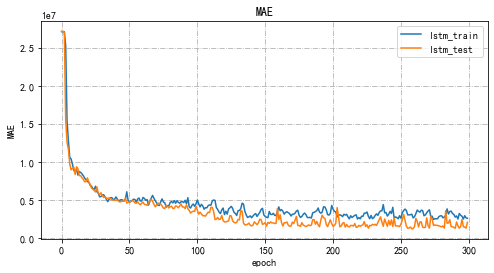

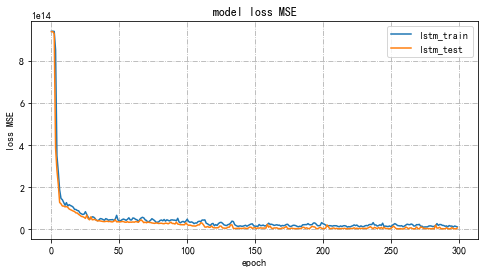

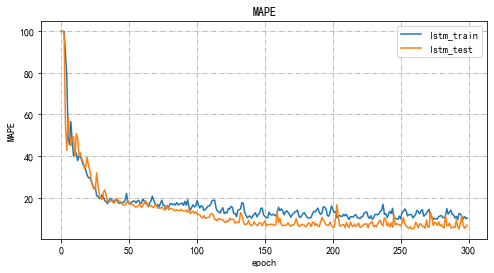

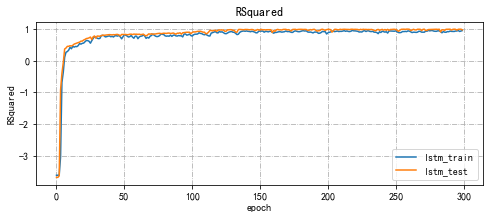

In [15]:
plt.figure(figsize=(8,4))
plt.plot(history_l.history['mae'],label='lstm_train')
plt.plot(history_l.history['val_mae'],label='lstm_test')
# plt.plot(history_g.history['mae'],label='gru_train')
# plt.plot(history_g.history['val_mae'],label='gru_test')
plt.title('MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
plt.legend(loc='best')
plt.grid(linestyle='-.')
plt.show()

# summarize history for loss
plt.figure(figsize=(8,4))
plt.plot(history_l.history['loss'],label='lstm_train')
plt.plot(history_l.history['val_loss'],label='lstm_test')
# plt.plot(history_g.history['loss'],label='gru_train')
# plt.plot(history_g.history['val_loss'],label='gru_test')
plt.title('model loss MSE')
plt.ylabel('loss MSE')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid(linestyle='-.')
plt.show()

plt.figure(figsize=(8,4))
plt.plot(history_l.history['mape'],label='lstm_train')
plt.plot(history_l.history['val_mape'],label='lstm_test')
# plt.plot(history_g.history['mape'],label='gru_train')
# plt.plot(history_g.history['val_mape'],label='gru_test')
plt.title('MAPE')
plt.ylabel('MAPE')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
plt.legend(loc='best')
plt.grid(linestyle='-.')
plt.show()


plt.figure(figsize=(8,3))
plt.plot(history_l.history['RSquared'],label='lstm_train')
plt.plot(history_l.history['val_RSquared'],label='lstm_test')
# plt.plot(history_g.history['RSquared'],label='gru_train')
# plt.plot(history_g.history['val_RSquared'],label='gru_test')
plt.title('RSquared')
plt.ylabel('RSquared')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
plt.legend(loc='best')
plt.grid(linestyle='-.')
plt.show()

这里MAE和MSE 的单位都不正确啊

需要的就是在测试集上面验证

In [16]:
#MSE  RMSE  MAE MAPE
import math
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('X_train MSE MAE MAPE R2',trainScore)
    print('Train Score: %.5f MSE (%.2f RMSE)  ' % (trainScore[0], math.sqrt(trainScore[0])))
    
    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('X_test MSE MAE MAPE R2',testScore)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

model_score(model_l, X_train, y_train , X_test, y_test)
print("====================================")

# model_score(model_g, X_train, y_train , X_test, y_test)

#  返回值就是loss=mean_squared_error', metrics=[ 'mae', 'mape', Rsqaure]

X_train MSE MAE MAPE R2 [14851208312911.107, 3078900.2, 10.581933, 0.9282447]
Train Score: 14851208312911.10742 MSE (3853726.55 RMSE)  
X_test MSE MAE MAPE R2 [7359219892224.0, 2098600.5, 6.858774, 0.9633472]
Test Score: 7359219892224.00000 MSE (2712788.21 RMSE)


# lstm测试集预测

In [17]:
model_l.evaluate(X_test,y_test)   
y_pre_test_l = model_l.predict(X_test, verbose=0)    #得到预测值  这个也能计算MSE
# y_pre_test_l = scaler.inverse_transform(y_pre_test_l) #用作反归一化的

print('predict',y_pre_test_l.shape)

print(y_test)
print(y_pre_test_l)

26/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 500us/sample - loss: 7359219892224.0000 - mae: 2098600.5000 - mape: 6.8588 - RSquared: 0.9633
predict (26, 1)
[35400000.         45700000.         46100000.         42400000.
 30100000.         12097891.211 

# gru测试集预测

In [18]:

# # 这里不应该有偏移的啊 不不用搞时间偏移 的啊  可以对上的感觉。 因为y是label  预测的也是label 是一个东西啊
# #所以取消使用# df_time = df.index[-len(y_pre_test):]   相应的取消plt.plot(df_time,)


# plt.figure(figsize=(6,4))
# plt.plot(y_test,color='red',label='true')
# plt.plot(y_pre_test_l,color='green',label='predict')
# plt.xlabel("时间")
# plt.ylabel("积雪面积数据")
# plt.legend(loc='best')
# plt.grid(True)
# # plt.savefig('result3-3.png')
# plt.show()

# # /////////////////////////////////////////////////////

# model_g.evaluate(X_test,y_test)
# y_pre_test_g = model_g.predict(X_test, verbose=0)    #得到预测值  这个也能计算MSE
# # y_pre_test_g = scaler.inverse_transform(y_pre_test_g) #用作反归一化的

# print('predict',y_pre_test_g.shape)
# print(y_pre_test_g)



# plt.figure(figsize=(6,4))
# # df_time = df.index[-len(y_pre_test):] #这是转化为同一时间 但是这里不应该使用df
# plt.plot(y_test,color='red',label='true')
# plt.plot(y_pre_test_g,color='green',label='predict')
# plt.xlabel("时间")
# plt.ylabel("积雪面积数据")
# plt.legend(loc='best')
# plt.grid(True)
# # plt.savefig('result3-3.png')
# plt.show()



In [19]:
# RMSE R2  ACC 
# 是计算归一化前还是后的呢

print('y_test',y_test.shape)
print(y_test)
print('y_pre_test_l',y_pre_test_l.shape)
print(y_pre_test_l)
# print('y_pre_test_g',y_pre_test_g.shape)
# print(y_pre_test_g)

def rmse(y_true, y_pred):
        return np.sqrt(np.mean(np.square(y_pred - y_true)))
    
lstm_rmse=rmse(y_pre_test_l,y_test)
# gru_rmse=rmse(y_pre_test_g,y_test)
print('lstm_rmse',lstm_rmse)
# print('gru_rmse',gru_rmse)

    
l_r2 = r2_score(y_test,y_pre_test_l)
# g_r2 = r2_score(y_test,y_pre_test_g)
print('l_r2',l_r2)
# print('g_r2',g_r2)

# #ACC
# error = 0
# summery = 0
# for i in range(23):
#     error += abs(y_pre_test[i] - y_test[i])
#     summery += y_test[i]
# acc = 1 - error/summery
# print('acc',acc)

y_test (26,)
[35400000.         45700000.         46100000.         42400000.
 30100000.         12097891.211       7450972.289       7143292.4685
  9500095.199      24116892.9992699  23950888.90098245 23276772.9020924
 34288769.6612648  46281340.3971747  46813376.7340057  41969700.0500564
 28841960.8946647  13072326.00133153  7412322.37857997  7213763.972919
 10479608.14166135 23285657.4810961  29670213.917476   24821120.98319741
 36676149.4276988  48133057.8812749 ]
y_pre_test_l (26, 1)
[[31413030. ]
 [43425060. ]
 [42090496. ]
 [37651896. ]
 [27681208. ]
 [13633792. ]
 [ 7336149. ]
 [ 7240108.5]
 [ 9788712. ]
 [22363926. ]
 [24370082. ]
 [21968444. ]
 [30223400. ]
 [43565840. ]
 [43520750. ]
 [42870070. ]
 [29056632. ]
 [14643655. ]
 [ 7329056.5]
 [ 7141558.5]
 [ 9911637. ]
 [22480782. ]
 [24976010. ]
 [22267614. ]
 [31771906. ]
 [42964532. ]]
lstm_rmse 19150265.091233984
l_r2 0.9633471977630044


# 训练集上的预测

In [20]:
model_l.evaluate(X_train,y_train)   #训练集上

y_pre_train = model_l.predict(X_train, verbose=0)    #得到预测值  这个也能计算MSE
# y_pre_train = scaler.inverse_transform(y_pre_train)

print('predict',y_pre_train.shape)
print(y_pre_train)


233/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [21]:
# y = scaler.inverse_transform(y)

In [22]:
df_time = dft.index[0:len(y_pre_train)]
df_time1 = dft.index[len(y_pre_train):]

df_res=dft.index[len(y_pre_train)-1:len(y_pre_train)+1]
# df_time1 = dft.index[:-len(y_pre_test)]  这个没有效果为什么

res=[y_pre_train[-1],y_pre_test_l[0]]

DatetimeIndex(['2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01', '2000-11-01', '2000-12-01',
               '2001-01-01', '2001-02-01',
               ...
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01'],
              dtype='datetime64[ns]', name='date', length=233, freq=None)
DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01',
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01'],
              dtype='datetime64[ns]', name='date', freq=None)
Date

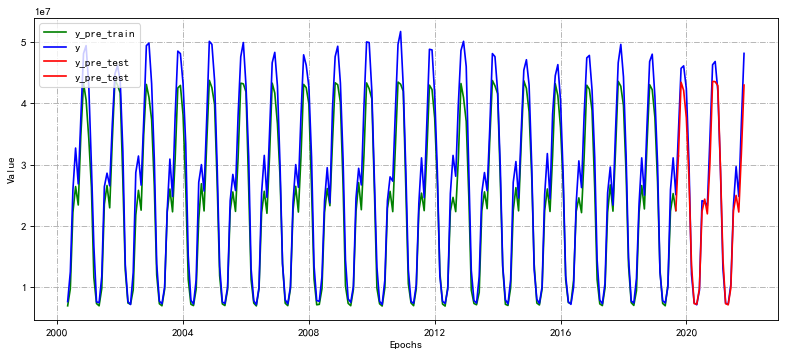

In [23]:
plt.figure(figsize=(12,5),dpi=80, facecolor='w', edgecolor='k')

plt.plot(df_time,y_pre_train, color='green', label='y_pre_train')
# plt.plot(df_time,y_train, color='blue', label='y_train')


plt.plot(dft.index,y, color='blue', label='y')  # 总的


plt.plot(df_res,res, color='red', label='y_pre_test')


plt.plot(df_time1,y_pre_test_l, color='red', label='y_pre_test')
# plt.plot(df_time1,y_test, color='blue', label='y_test')


plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend(loc='best')
plt.grid(linestyle='-.')
print(df_time)
print(df_time1)
print(df_res)  # 缝补
print(dft.index) #总的
plt.show()


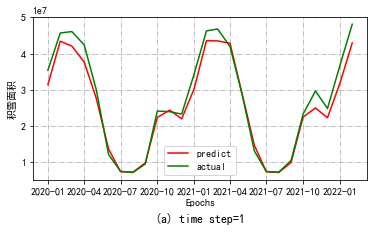

In [24]:
#这是发生偏移的


plt.figure(figsize=(6,3))

df_time2=df.index[-len(y_test):]
plt.plot(df_time2,y_pre_test_l, color='red', label='predict')

plt.plot(df_time2,y_test, color='green', label='actual')
plt.xlabel("Epochs")
plt.ylabel("积雪面积")
plt.legend(loc='best')
plt.grid(linestyle='-.')
plt.title('(a) time step=1', y=-0.3)
plt.show()

In [25]:
sss

NameError: name 'sss' is not defined

In [ ]:
pre = model.predict(X_test, verbose=1) 
pre.shape

In [ ]:
y_test.shape

In [ ]:
score = r2_score(y_test, pre)
score

In [ ]:
pre_train = model.predict(X_train, verbose=1) 
pre_test = model.predict(X_test, verbose=1) 

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(pre_train, color='red', label='pre_train')
plt.plot(y_train, color='red', label='y_train')
# plt.plot(df['SCA_NH'], color='red', label='y_train')

plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend(loc='best')
plt.grid(linestyle='-.')
print(df.index)
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
df_time2=df.index[-len(y_test):]
plt.plot(df_time2,pre_test, color='red', label='pre_test')

plt.plot(df_time2,y_test, color='green', label='y_test')
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend(loc='best')
plt.grid(linestyle='-.')
plt.show()

In [ ]:
# pre_train=pre_train.tolist()[0][0]
# pre_train.append(pre_test.tolist()[0][0])

# plt.figure(figsize=(16,8))
# plt.plot(pre_train, color='green', label='pre_train')
# plt.plot(pre_test, color='blue', label='y_train')
# plt.plot(y, color='red', label='y_train')
# plt.xlabel("Epochs")
# plt.ylabel("Value")
# plt.legend(loc='best')
# plt.grid(linestyle='-.')
# plt.show()

知道这个衡量指标的
1 不知道为啥这个指标为什么这么大  
mse 和mae  为什么这么大  现在这2个不大了  但是mape 又大了

2 做出不同的模型随着epoch的loss 下降的过程   就是选择最优的epoch   这个的难点主要是画图某种程度上
但是这个是基于每个模型的最优情况吗
3 还有就是 做出预测值在训练集和测试集上的精度   这个也是画图

主要是涉及一个最优的 情况  所以只能控制变量了吗

shuffle = True  目前是打乱的情况 这样的效果
shuffle= Flase的情况       倾向于还是shuffle=False的情况

verbose=0 =1 =2  的情况 

在y数据上加上时间x 的属性
index=date

https://www.jb51.net/article/228826.htm   loc  iloc操作

这个曲线连接不上啊   简单缝补了下 可以了

----------

反归一化 
MAPE

还有就是 记忆和预测 [1,2,3]  [1,2,3]
系统评估 超参数  以及设置输出model系数的路径
确定随机种子 以及可编辑可视化图像



多变量的时候
是把SCA_NH 和三个分量作为输入  然后推迟预测的天数作为预测的输出了


时间预测 既具有连续性 又具有随机性
提升
数据输入进神经网络前进行归一化是很有必要的 因为进行归一化可以很好的提升收敛速度和效果。
因为LSTM的默认激活函数为tanh函数，输出范围在[-1,1]之间，可以使用MinMaxScaler将数据转换到[-1,1]。

In [ ]:
#https://github.com/lsyndxiaoyuer/LSTM_predict_stock/blob/main/use%20LSTM%20to%20predict%20stocks%20price-Copy1.ipynb
# 这个LSTM的原型